In [1]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
# from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [30]:
### should use dropouts after convnets or maxpools
## in the case of inception networks use spatialdropout layers to remove coorelation
## L1 L2 regularizers hypertune look in phone image for how
### if overfits increase dropout rate
### another regularisation is to bound weights of a layer look for image in phone
## always shuffle your dataset during and before training
### set class weights for imbalanced datasets look in phone for how
### use sgd+ optimiser instead of relu
### if you are training your network from scratch use lr slightly greater than 1e-4 or use learning rate scheduler

In [3]:
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(7))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1

In [12]:
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_data = train_datagen.flow_from_directory('archive\\train' ,target_size = (224,224), batch_size= 64 , class_mode = 'binary')

Found 28709 images belonging to 7 classes.


In [14]:
test_data = test_datagen.flow_from_directory('archive\\test' ,target_size = (224,224), batch_size= 64 , class_mode = 'binary')

Found 7178 images belonging to 7 classes.


In [10]:
opt = tf.keras.optimizers.Adam(learning_rate = 1e-4)
AlexNet.compile(loss = 'sparse_categorical_crossentropy' , optimizer = opt , metrics = ['accuracy'])

In [16]:
history = AlexNet.fit(train_data, epochs=15, validation_data=test_data)

Epoch 1/15
449/449 [==============================] - 1418s 3s/step - loss: 0.9680 - accuracy: 0.6570 - val_loss: 1.0942 - val_accuracy: 0.5963
Epoch 2/15
449/449 [==============================] - 3565s 8s/step - loss: 0.9515 - accuracy: 0.6631 - val_loss: 1.0473 - val_accuracy: 0.6183
Epoch 3/15
449/449 [==============================] - 1416s 3s/step - loss: 0.9342 - accuracy: 0.6692 - val_loss: 1.3161 - val_accuracy: 0.5111
Epoch 4/15
449/449 [==============================] - 1413s 3s/step - loss: 0.9108 - accuracy: 0.6795 - val_loss: 1.0847 - val_accuracy: 0.6028
Epoch 5/15
449/449 [==============================] - 1605s 4s/step - loss: 0.8945 - accuracy: 0.6837 - val_loss: 1.0869 - val_accuracy: 0.6085
Epoch 6/15
449/449 [==============================] - 2007s 4s/step - loss: 0.8699 - accuracy: 0.6939 - val_loss: 1.1729 - val_accuracy: 0.5763
Epoch 7/15
449/449 [==============================] - 2076s 5s/step - loss: 0.8619 - accuracy: 0.6981 - val_loss: 1.0083 - val_accuracy:

In [17]:
history = AlexNet.fit(train_data, epochs=15, validation_data=test_data)

Epoch 1/15
449/449 [==============================] - 1388s 3s/step - loss: 0.7158 - accuracy: 0.7526 - val_loss: 0.9865 - val_accuracy: 0.6588
Epoch 2/15
449/449 [==============================] - 1388s 3s/step - loss: 0.7026 - accuracy: 0.7550 - val_loss: 1.0743 - val_accuracy: 0.6271
Epoch 3/15
449/449 [==============================] - 1384s 3s/step - loss: 0.6843 - accuracy: 0.7643 - val_loss: 1.0337 - val_accuracy: 0.6410
Epoch 4/15
449/449 [==============================] - 1385s 3s/step - loss: 0.6742 - accuracy: 0.7668 - val_loss: 1.0463 - val_accuracy: 0.6432
Epoch 5/15
449/449 [==============================] - 1387s 3s/step - loss: 0.6671 - accuracy: 0.7703 - val_loss: 1.0422 - val_accuracy: 0.6382
Epoch 6/15
449/449 [==============================] - 1386s 3s/step - loss: 0.6461 - accuracy: 0.7779 - val_loss: 0.9692 - val_accuracy: 0.6643
Epoch 7/15
449/449 [==============================] - 1387s 3s/step - loss: 0.6370 - accuracy: 0.7805 - val_loss: 1.0932 - val_accuracy:

In [19]:
AlexNet.save_weights('AlexNet_final.h5')

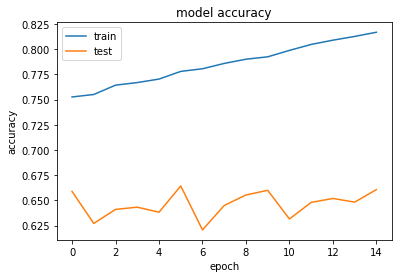

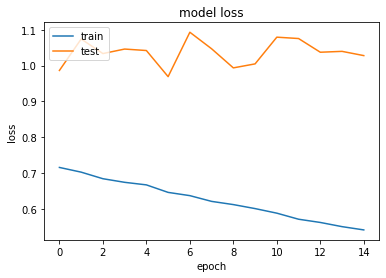

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 

# 